In [ ]:
!rm -rf *
!git config --global user.name "Akhilez"
!git config --global user.email "akhild18@yahoo.com"
!git clone https://github.com/Akhilez/ml_gallery.git
%cd ml_gallery/ml_py

Cloning into 'ml_gallery'...
remote: Enumerating objects: 529, done.
remote: Counting objects: 100% (529/529), done.
remote: Compressing objects: 100% (363/363), done.
remote: Total 2056 (delta 310), reused 337 (delta 152), pack-reused 1527
Receiving objects: 100% (2056/2056), 11.69 MiB | 30.15 MiB/s, done.
Resolving deltas: 100% (1248/1248), done.
/content/ml_gallery/ml_py/ml_gallery/ml_py


In [ ]:
import os
os.environ['SECRET_KEY'] = '1234'
%mkdir -p data/mnist/numbers

In [ ]:
import torch
from torch.nn.functional import relu
from collections import namedtuple
from lib.mnist_aug.mnist_augmenter import DataManager, MNISTAug

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
aug = MNISTAug()
dm = DataManager()
dm.load()
aug.max_objects = 10
aug.min_objects = 4

Extracting /content/ml_gallery/ml_py/data/mnist/numbers/MNIST/raw/train-images-idx3-ubyte.gz to /content/ml_gallery/ml_py/data/mnist/numbers/MNIST/raw


Extracting /content/ml_gallery/ml_py/data/mnist/numbers/MNIST/raw/train-labels-idx1-ubyte.gz to /content/ml_gallery/ml_py/data/mnist/numbers/MNIST/raw




Extracting /content/ml_gallery/ml_py/data/mnist/numbers/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/ml_gallery/ml_py/data/mnist/numbers/MNIST/raw


Extracting /content/ml_gallery/ml_py/data/mnist/numbers/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/ml_gallery/ml_py/data/mnist/numbers/MNIST/raw
Processing...
Done!




In [ ]:
x_train, y_train = aug.get_augmented(dm.x_train, dm.y_train, 10)
x_test, y_test = aug.get_augmented(dm.x_test, dm.y_test, 2)

In [ ]:
x_train = torch.tensor(x_train.reshape(-1, 1, 112, 112)).type('torch.FloatTensor')
x_test = torch.tensor(x_test.reshape(-1, 1, 112, 112)).type('torch.FloatTensor')

[{'class': tensor(9),
  'class_one_hot': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  'cx': 30.0,
  'cy': 72.0,
  'height': 14,
  'width': 14,
  'x1': 23,
  'x2': 37,
  'y1': 65,
  'y2': 79},
 {'class': tensor(3),
  'class_one_hot': tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  'cx': 13.5,
  'cy': 47.5,
  'height': 25,
  'width': 25,
  'x1': 1,
  'x2': 26,
  'y1': 35,
  'y2': 60},
 {'class': tensor(1),
  'class_one_hot': tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'cx': 46.0,
  'cy': 54.0,
  'height': 34,
  'width': 34,
  'x1': 29,
  'x2': 63,
  'y1': 37,
  'y2': 71},
 {'class': tensor(8),
  'class_one_hot': tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  'cx': 43.5,
  'cy': 87.5,
  'height': 31,
  'width': 31,
  'x1': 28,
  'x2': 59,
  'y1': 72,
  'y2': 103},
 {'class': tensor(8),
  'class_one_hot': tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  'cx': 98.5,
  'cy': 15.5,
  'height': 25,
  'width': 25,
  'x1': 86,
  'x2': 111,
  'y1': 3,
  'y2': 28},
 {'cl

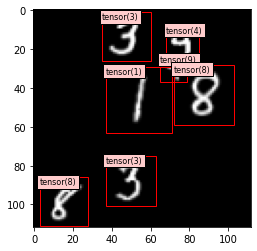

In [ ]:
DataManager.plot_num(x_train[0].reshape((112, 112)), y_train[0])
y_train[0]

In [42]:
# 14 * 14  = 196 anchor boxes
# side of each anchor box = 28

n_anchors = 14 * 14

anchor_grid_spacing = 8

anchor_centers = []
for i in range(14):
  anchor_row = []
  for j in range(14):
    anchor_row.append(namedtuple('AnchorCenter', ['x', 'y'])(**{
      'y': i * anchor_grid_spacing + anchor_grid_spacing / 2,
      'x': j * anchor_grid_spacing + anchor_grid_spacing / 2
    }))
  anchor_centers.append(anchor_row)

In [ ]:
def units_to_diff(y):
    y_d = []
    for i in range(len(y)):
      yi_d = []
      for j in range(len(y[i])):
        cx_d = (y[i][j]['cx'] - anchor_centers[i][j].x) / 112
        cy_d = (y[i][j]['cy'] - anchor_centers[i][j].y) / 112
        w_d = (y[i][j]['width'] - 28) / 112
        yi_d.append((cx_d, cy_d, w_d))
      y_d.append(yi_d)
    return y_d

def diff_to_units(y):
    y_units = []
    for i in range(len(y)):
        cx_d = y[i][0] * 112 + anchor_cx
        cy_d = y[i][1] * 112 + anchor_cy
        wd = y[i][2] * 112 + anchor_w
        y_units.append((cx_d, cy_d, wd))
    return torch.tensor(y_units)

In [ ]:
y_d = units_to_diff(y_train)
y_d_test = units_to_diff(y_test)

In [ ]:
y_d_test[0]

[(0.6205357142857143, 0.59375, -0.08035714285714286),
 (0.18303571428571427, 0.05803571428571429, -0.0625),
 (0.7276785714285714, 0.32589285714285715, -0.08035714285714286),
 (0.14285714285714285, 0.36607142857142855, 0.14285714285714285),
 (0.33035714285714285, 0.7857142857142857, -0.017857142857142856),
 (-0.24553571428571427, 0.6830357142857143, 0.008928571428571428),
 (0.32142857142857145, 0.15178571428571427, -0.05357142857142857),
 (-0.3705357142857143, 0.15625, -0.0625),
 (-0.19196428571428573, 0.6473214285714286, 0.044642857142857144)]

In [44]:
class BoxPredictor(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = torch.nn.Linear(4096, 1024)
    self.linear2 = torch.nn.Linear(1024, 3 * n_anchors)

  def forward(self, x):
    x = relu(self.linear1(x))
    x = torch.tanh(self.linear2(x))
    return x


class ConfidencePredictor(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = torch.nn.Linear(4096, 1024)
    self.linear2 = torch.nn.Linear(1024, 2 * n_anchors)

  def forward(self, x):
    x = relu(self.linear1(x))
    x = torch.nn.functional.softmax(self.linear2(x).reshape((-1, n_anchors, 2)), 2)
    return x


class DetectorV1 (torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(1, 32, 3, padding=1)  # 112x112
        self.conv2 = torch.nn.Conv2d(32, 64, 3, stride=2, padding=1)  # 56x56
        self.conv3 = torch.nn.Conv2d(64, 128, 3, stride=2, padding=1)  # 28x28
        self.conv4 = torch.nn.Conv2d(128, 256, 3, stride=2, padding=1)  # 14x14
        self.conv5 = torch.nn.Conv2d(256, 512, 3, stride=2, padding=1)  # 7x7
        self.linear1 = torch.nn.Linear(25088, 4096)
        self.box_predictor = BoxPredictor()
        self.confidence_predictor = ConfidencePredictor()

    def forward(self, x):
        x = relu(self.conv1(x))  # 112
        x = relu(self.conv2(x))  # 56
        x = relu(self.conv3(x))  # 28
        x = relu(self.conv4(x))  # 14
        x = relu(self.conv5(x))  # 7
        x = torch.flatten(x, 1)
        x = relu(self.linear1(x))
        boxes = self.box_predictor(x)
        confidences = self.confidence_predictor(x)
        return boxes, confidences

model = DetectorV1().to(device)
optimizer = torch.optim.Adam(model.parameters())

Steps:
 - get the predictions.
 - Find the anchors which have >0.1 IoU -> +ve anchors
 - Find the matching bounding box for each +ve anchor
 - All +ve anchors are high confidence, rest are low.
 - What is the loss for -ve anchors?